In [142]:
import numpy as np
import collections
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


FN = 10
n = 10

def FQ(X, fn):
    N = len(X[0])
    feature_freq = np.zeros((len(X),fn)) 
    for j in range(len(X)):
        X_FFT_j = 2.0/N * np.abs(fft(X[j])[0:N//2])
        #X_FFT_j = fft(X[j])
        feature_freq[j]=np.argsort(X_FFT_j)[::-1][:fn]
    return feature_freq

def FM(fq, y, n):
    AF = {}
    feature_matrix = []
    for label in range(max(y)+1):
        AF[label]=np.empty((0,0))
        for i in range(len(y)):
            if y[i] == label:
                AF[label] = np.append(AF[label],fq[i])
        count = collections.Counter(AF[label])
        sorted_AF_label = sorted(count.items(), key=lambda x: x[1], reverse=True)
        feature_matrix.append([x[0] for x in sorted_AF_label[:n]])
    return np.vstack(feature_matrix)

def SR(A,B):
    score = []
    for h in range(len(B)):
        scoreh = len(set(A[:10]).intersection(set(B[h])))
        scoreh += len(set(np.concatenate((A[:6],A[:6]+1,A[:6]-1))).intersection(set(B[h])))
        scoreh += 4*len(set(A[:3]).intersection(set(B[h][:3])))
        score.append(scoreh)
    return np.array(score)

def SB(fq,fm):
    Scoreboard = []
    for j in range(len(fq)):
        score = SR(fq[j], fm)
        Scoreboard.append(score)
    return np.array(Scoreboard)

In [ ]:
n_point = 10000

n_smaple = 50

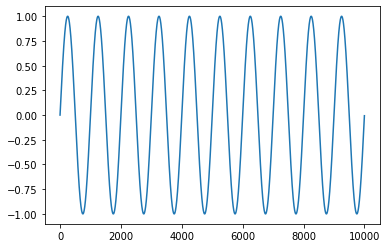

In [143]:
plt.plot(np.sin(np.arange(0,1,1/n_point)*2*np.pi*10)) #0-1上 10000个点

sin10 = np.sin(np.arange(0,1,1/n_point)*2*np.pi*10)
sin30 = np.sin(np.arange(0,1,1/n_point)*2*np.pi*30)
sin60 = np.sin(np.arange(0,1,1/n_point)*2*np.pi*60)
sin80 = np.sin(np.arange(0,1,1/n_point)*2*np.pi*80)
noise = np.random.rand(n_point)

In [127]:
x_1 = np.tile(sin10+sin60+np.random.rand(n_point),(n_smaple,1))

In [128]:
x_1.shape

(50, 10000)

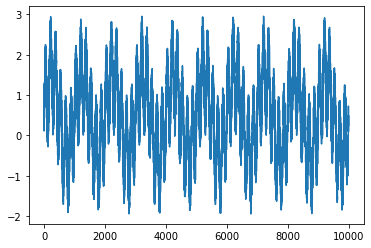

In [129]:
plt.plot(x_1[0])

In [130]:
x_2 = np.tile(sin30+sin80+np.random.rand(n_point),(n_smaple,1))

In [131]:
x = np.vstack((x_1,x_2))

In [132]:
x.shape

(100, 10000)

In [133]:
y=[0]*n_smaple+[1]*n_smaple

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [135]:
Feature_Matrix = FM(FQ(X_train, FN), y_train, n)

In [136]:
Feature_Matrix

array([[   0., 6707., 3293., 1740., 8260., 1526., 8474., 7321., 2679.,
        5093.],
       [   0.,  858., 9142., 7138., 2862., 9813.,  187., 1779., 8221.,
        9453.]])

In [137]:
Scoreboard = SB(FQ(X_test, FN), Feature_Matrix)

In [138]:
np.hstack((Scoreboard, np.array(y_test).reshape(len(y_test),1)))

array([[28,  6,  0],
       [ 6, 28,  1],
       [28,  6,  0],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [28,  6,  0],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [ 6, 28,  1],
       [28,  6,  0],
       [ 6, 28,  1],
       [28,  6,  0],
       [28,  6,  0],
       [28,  6,  0],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [28,  6,  0],
       [28,  6,  0],
       [ 6, 28,  1],
       [ 6, 28,  1],
       [ 6, 28,  1]])